In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from PIL import Image
import json
from keras.models import model_from_json
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
face_cascade = cv2.CascadeClassifier('../../data/haarcascade_frontalface_default.xml')

In [3]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        print("Face detected!")
        x,y,w,h = faces[0]
        return new_size(img_bw[y:y+h,x:x+w])
    else:
        raise ValueError("No face found")
        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path)
    plt.imshow(img)
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

def new_size(img):
    size=(48,48)
    convert_to = Image.fromarray(img)
    convert_from = convert_to.resize(size)
    face=asarray(convert_from)/255
    return face

Detecting faces in ../../data/yo.jpg
Face detected!


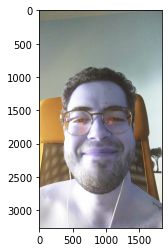

In [14]:
face = openImageAndDetectFaces("../../data/yo.jpg")

In [10]:
with open('fer.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('fer_model.h5')

Detecting faces in ../../data/cv.jpg
Face detected!
Probs -> angry:0.00000 disgust:0.00000 fear:0.00000 happy:1.00000 sadness:0.00000 surprise:0.00000 neutral:0.00000


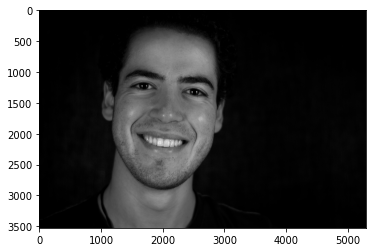

In [12]:
PIC = openImageAndDetectFaces("../../data/cv.jpg")

PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

In [14]:
with open('model.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('my_model.h5')

Detecting faces in ../../data/cv.jpg
Face detected!
Probs -> angry:0.20018 disgust:0.01122 fear:0.09040 happy:0.14689 sadness:0.09956 surprise:0.39599 neutral:0.05576


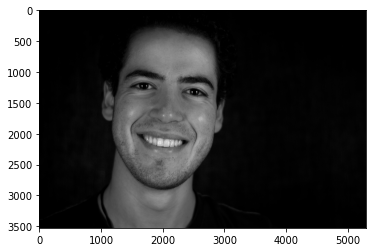

In [15]:
PIC = openImageAndDetectFaces("../../data/cv.jpg")
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

In [42]:
print("Today you are", senti[max(range(len(pred2)), key = lambda x: pred2[x])])

Today you are surprise
